## Statistics Practical Implementation
### Measure Of Central Tendency

1. Mean
2. Median
3. Mode

In [ ]:
ages=[23,24,32,45,12,43,67,.1,2,45,32,56,32,120]

In [ ]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))
#print(np.mode(ages))

38.07857142857143
32.0


In [ ]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

38.07857142857143
32.0


In [ ]:
import statistics
statistics.mode(ages)

32

<Axes: >

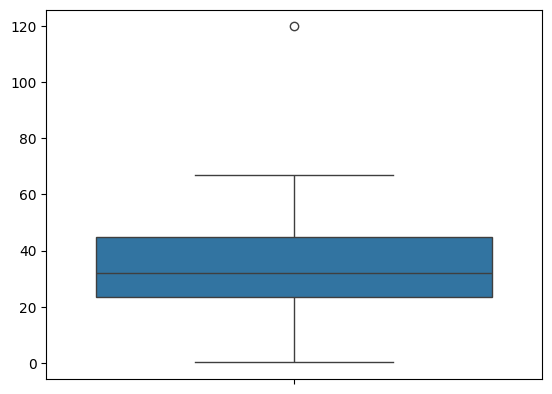

In [ ]:
import seaborn as sns
sns.boxplot(ages)

## 5 Number Summary

In [ ]:
import numpy as np
q1,q3=np.percentile(ages,[25,75])

In [ ]:
print(q1,q3)

30.0 47.75


In [ ]:
## to check outlier[Lower Fence- Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


In [ ]:
a=([ages]>lower_fence)&([ages]<higher_fence)
a

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False]])

## Measure Of Dispersion

1. Variance
2. Standard Deviation

In [ ]:
statistics.variance(ages)

In [ ]:
np.var(ages,axis=0)

In [ ]:
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance



In [ ]:
variance(ages)

In [ ]:
def variance(data,dof=0):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance


In [ ]:
variance(ages,dof=1)

## Histograms And PDF

In [ ]:
import seaborn as sns
sns.histplot(ages,kde=True)

In [ ]:
import seaborn as sns
df=sns.load_dataset('iris')

<Axes: >

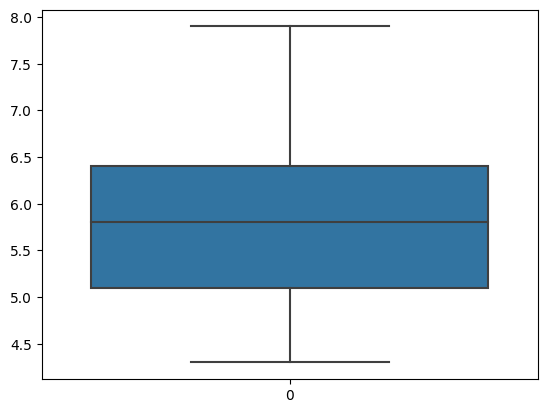

In [ ]:
d=df['sepal_length']
sns.boxplot(d)

In [ ]:
sns.histplot(df['sepal_length'],kde=True)

In [ ]:
sns.histplot(df['sepal_width'],kde=True)

In [ ]:
sns.histplot(df['petal_length'],kde=True)

In [ ]:
sns.histplot(df['petal_width'],kde=True)

In [ ]:
## create a normal distributed data
import numpy as np
s=np.random.normal(0.5,0.2,1000)

In [ ]:
s

In [ ]:
sns.histplot(s,kde=True)

## Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [ ]:
mu, sigma = 3., 1. # mean and standard deviation
s1 = np.random.lognormal(mu, sigma,1000)

In [ ]:
sns.histplot(s1,kde=True)

<Axes: ylabel='Count'>

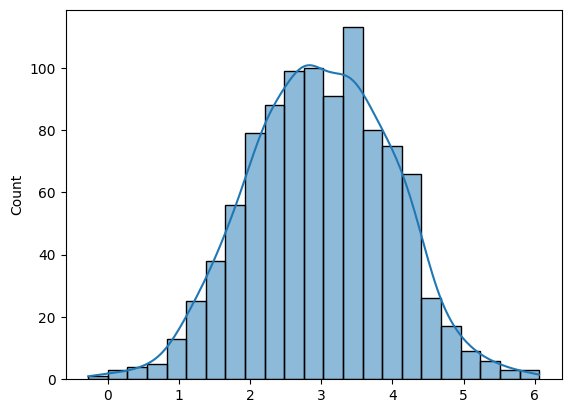

In [ ]:
sns.histplot(np.log(s1),kde=True)

## Check whether Disstribution is Normal Distribution

In [ ]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


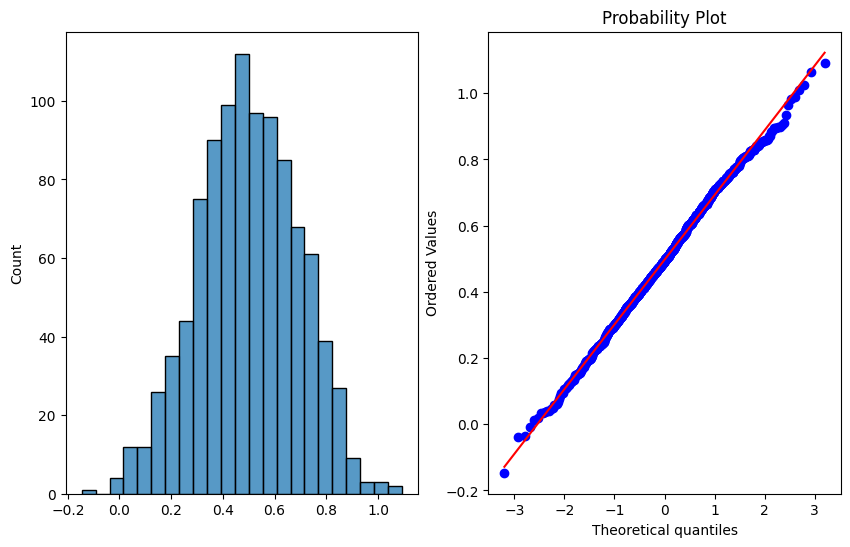

In [ ]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

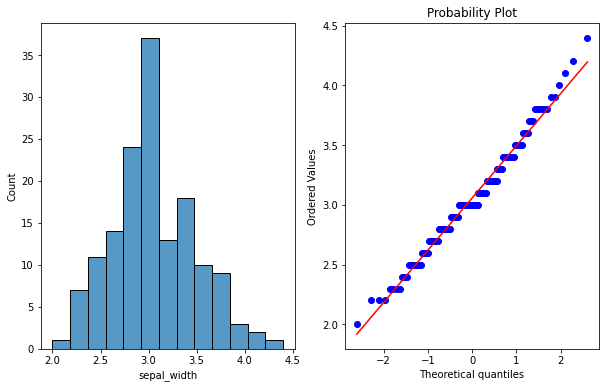

In [ ]:
plot_data(df['sepal_width'])

In [ ]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [ ]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

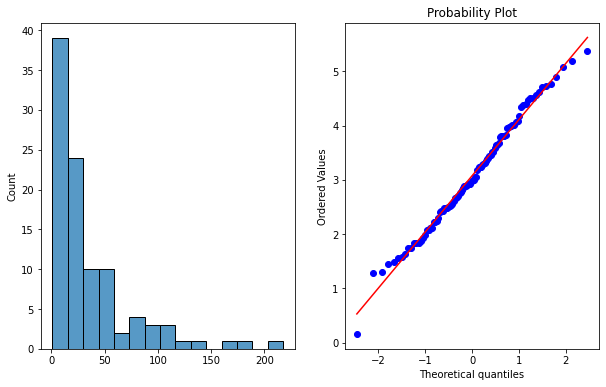

In [ ]:
plot_data_log(sample)

#Covarience

In [ ]:
from statistics import covariance

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 2, 3, 1, 2, 3, 1, 2, 3]
covariance(x, y)


0.75

##Pearson Correlation

In [ ]:
data = {'list 1':[2,4,6,8],'list 2':[4,16,36,64]}

import pandas as pd #To Convert your lists to pandas data frames convert your lists into pandas dataframes

df = pd.DataFrame(data, columns = ['list 1','list 2'])

from scipy import stats # For in-built method to get PCC

pearson_coef= stats.pearsonr(df["list 1"], df["list 2"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef)

Pearson Correlation Coefficient:  PearsonRResult(statistic=0.9843740386976971, pvalue=0.01562596130230287)


_______________________________________OR_________________________________

In [ ]:
def corr(data1, data2):
    "data1 & data2 should be NumPy arrays."
    mean1 = data1.mean()
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()

    #corr = ((data1-mean1)*(data2-mean2)).mean()/(std1*std2)
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr

Spearmen's Rank

In [ ]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                   'math': [70, 78, 90, 87, 84, 86, 91, 74, 83, 85],
                   'science': [90, 94, 79, 86, 84, 83, 88, 92, 76, 75]})
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(df['math'], df['science'])

#print Spearman rank correlation and p-value
print(rho)

-0.41818181818181815


In [ ]:
df=sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
s=df[df['placement_exam_marks']>84.5]
s.shape

(15, 3)

In [ ]:
df.shape

(1000, 3)

In [ ]:
df.tail()

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1
999,4.90,10.0,1


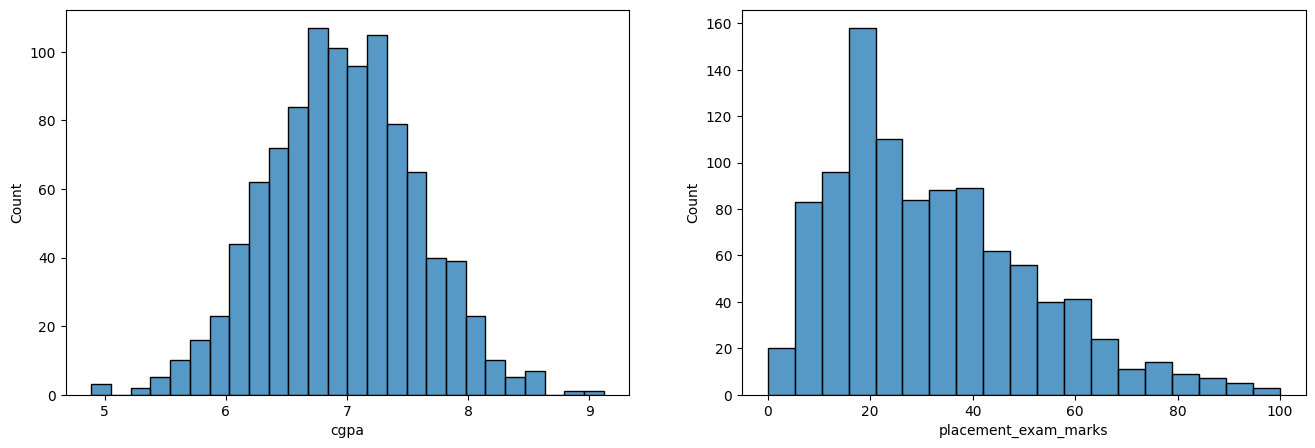

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

In [ ]:
import numpy as np
q1,q3=np.percentile(df['placement_exam_marks'],[25,75])
q1

17.0

In [ ]:
q3

44.0

In [ ]:
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

-23.5 84.5


In [ ]:
a=df[(df['placement_exam_marks']>lower_fence)&(df['placement_exam_marks']<higher_fence)]
a

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>higher_fence,
    higher_fence,
    np.where(
        df['placement_exam_marks']<lower_fence,
        lower_fence,

    )df['placement_exam_marks']
)

In [ ]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [ ]:
s=df['placement_exam_marks']>higher_fence
s

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: placement_exam_marks, Length: 1000, dtype: bool

In [ ]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [ ]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [ ]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [ ]:
# Approach 2

# Calculating the Zscore

z=df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
z

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa, Length: 1000, dtype: float64

In [ ]:
d=df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]
print(d)

     cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.19                  26.0       1     0.371425
1    7.46                  38.0       1     0.809810
2    7.54                  40.0       1     0.939701
3    6.42                   8.0       1    -0.878782
4    7.23                  17.0       0     0.436371
..    ...                   ...     ...          ...
991  7.04                  57.0       0     0.127878
992  6.26                  12.0       0    -1.138565
993  6.73                  21.0       1    -0.375452
994  6.48                  63.0       0    -0.781363
998  8.62                  46.0       1     2.693239

[995 rows x 4 columns]


--------------OR---------------------

In [ ]:
#Z score
def detect_outlier(data):
  outlier=[]
  threshold=3  ## should be away from 3rd s.d.
  mean=np.mean(data)
  sd=np.std(data)
  for i in data:
    z_score=(i-mean)/sd
    if np.abs(z_score)>threshold:
      outlier.append(i)
  return outlier

In [ ]:
detect_outlier(df['placement_exam_marks'])

[94.0, 93.0, 90.0, 90.0, 96.0, 90.0, 97.0, 100.0]

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [ ]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [ ]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [ ]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


#Capping

In [ ]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:
upper_limit

8.808933625397168

In [ ]:

lower_limit

5.113546374602832

In [ ]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [ ]:
df.shape

(1000, 4)

In [ ]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# Z-test
Z-test is a statistical method to determine whether the distribution of the test statistics can be approximated by a normal distribution. It is the method to determine whether two sample means are approximately the same or different when their variance is known and the sample size is large (should be >= 30).
When to Use Z-test:

The sample size should be greater than 30. Otherwise, we should use the t-test.
Samples should be drawn at random from the population.
The standard deviation of the population should be known.
Samples that are drawn from the population should be independent of each other.
The data should be normally distributed, however for large sample size, it is assumed to have a normal distribution.
#Hypothesis Testing

A hypothesis is an educated guess/claim about a particular property of an object. Hypothesis testing is a way to validate the claim of an experiment.


1.   Null Hypothesis: The null hypothesis is a statement that the value of a population parameter (such as proportion, mean, or standard deviation) is equal to some claimed value. We either reject or fail to reject the null hypothesis. Null Hypothesis is denoted by H0.

2.   Alternate Hypothesis: The alternative hypothesis is the statement that the parameter has a value that is different from the claimed value. It is denoted by HA
#Level of significance:
It means the degree of significance in which we accept or reject the null-hypothesis. Since in most of the experiments 100% accuracy is not possible for accepting or rejecting a hypothesis, so we, therefore, select a level of significance. It is denoted by alpha (∝).
#Steps to perform Z-test:

First, identify the null and alternate hypotheses.
Determine the level of significance (∝).
Find the critical value of z in the z-test using
Calculate the z-test statistics. Below is the formula for calculating the z-test statistics

                        Z  = (X- \mu)/(sigma\sqrt(n))

where,
X¯: mean of the sample.
Mu: mean of the population.
Sd: Standard deviation of the population.
n: sample size.
Now compare with the hypothesis and decide whether to reject or not to reject the null hypothesis.
#Type of Z-test

#Left-tailed Test:
 In this test, our region of rejection is located to the extreme left of the distribution. Here our null hypothesis is that the claimed value is less than or equal to the mean population value.

#Right-tailed Test:
In this test, our region of rejection is located to the extreme right of the distribution. Here our null hypothesis is that the claimed value is less than or equal to the mean population value.
#Two-tailed test:
In this test, our region of rejection is located to both extremes of the distribution. Here our null hypothesis is that the claimed value is equal to the mean population value.



#Problem:
A school claimed that the students’ study that is more intelligent than the average school. On calculating the IQ scores of 50 students, the average turns out to be 110. The mean of the population IQ is 100 and the standard deviation is 15. State whether the claim of principal is right or not at a 5% significance level.


1.First, we define the null hypothesis and the alternate hypothesis. Our null hypothesis will be:
H(0) : mu  = 100
and our alternate hypothesis.

H(A) : mu > 100
State the level of significance. Here, our level of significance given in this question (∝ =0.05), if not given then we take ∝=0.05.
Now, we look up to the z-table. For the value of ∝=0.05, the z-score for the right-tailed test is 1.96.
Now, we perform the Z-test on the problem:
Z  =  (X- mu)}/(sigma /sqrt(n))
Where:
X = 110
Mean (mu) = 100
Standard deviation (sigma) = 15
Significance level (alpha) = 0.05
n = 50
 ( 110-100 )/(15/sqrt(50))
10/(15/sqrt(50))
10/2.12
4.71
Here 4.71 >1.96, so we reject the null hypothesis. If z-test statistics is less than z-score, then we will not reject the null hypothesis.

In [ ]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

# Generate a random array of 50 numbers having mean 110 and sd 15
# similar to the IQ scores data we assume above
mean_iq = 110
sd_iq = 15/math.sqrt(50)
alpha =0.05
null_mean =100
data = sd_iq*randn(50)+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))

# now we perform the test. In this function, we passed data, in the value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger

ztest_Score, p_value= ztest(data,value = null_mean)
# the function outputs a p_value and z-score corresponding to that value, we compare the
# p-value with alpha, if it is greater than alpha then we do not null hypothesis
# else we reject it.
print(ztest_Score)
print(p_value)
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

mean=109.99 stdv=1.95
35.803157467447555
4.931363859346591e-281
Reject Null Hypothesis


In [ ]:
Ammonium_chloride=[13.4,10.9,11.2,11.8,14,15.3,14.2,12.6,17,16.2,16.5,15.7]
Urea=[12,11.7,10.7,11.2,14.8,14.4,13.9,13.7,16.9,16,15.6,16]
from scipy import stats

t_value,p_value=stats.ttest_ind(Ammonium_chloride,Urea)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the

effect of ammonium chloride and urea on grain yield of paddy are not equal i.e., μ1 = μ2 at %.2f level of significance.'''%alpha)

else:

    print('We do not reject the null hypothesis H0')

Test statistic is 0.184650
p-value for two tailed test is 0.855195
We do not reject the null hypothesis H0


#Pearson’s Chi-Square
 Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables. We will perform this chi-square test first using a mathematical approach and then using Python’s scipy module.
#The Contingency Table
The Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables. Here, we are taking a table that shows the number of men and women buying different types of pets.
 	    dog	cat	bird	total
men	  207	282	241	  730
women	234	242	232	  708
total	441	524	473	  1438
#Null Hypothesis
A null Hypothesis is a general statistical statement or assumption about a population parameter that is assumed to be true Until we have sufficient evidence to reject it.

It is generally denoted by Ho.
#Alternate Hypothesis
 The Alternate Hypothesis is considered as competing of the null hypothesis. It is generally denoted by H1. The general goal of our hypothesis testing is to test the Alternative hypothesis against the null hypothesis.
 #P-Value
A P-value is used as a measure of evidence against the null hypothesis. If it is greater than our level of significance then we will accept our null hypothesis.
#Chi-Square Mathematical Approach
The aim of this chi-square test is to conclude whether the two variables( gender and choice of pet ) are related to each other not.

Null hypothesis: We start by defining our null hypothesis (H0) which states that there is no relation between the variables.

Alternate hypothesis: It would state that there is a significant relationship between the two variables.

We will verify our hypothesis using these methods:

Expected Values Table

Next, we prepare a similar table of calculated(or expected) values. To do this we need to calculate each item in the new table as:

                                                              (row total)*(column\ total)/(grand\ total)
The expected values table :

 	     dog	        cat	           bird	          total
men   223.87343533	266.00834492	 240.11821975	  730
women	217.12656467	257.99165508	 232.88178025	  708
total	441	          524	         473  1438

---



In [ ]:
from scipy.stats import chi2_contingency

# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.1031971404730939
Independent (H0 holds true)


In [ ]:
from scipy.stats import f_oneway

# Performance when each of the engine
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

# Conduct the one-way ANOVA
f_oneway(performance1, performance2, performance3, performance4)

F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

In [ ]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = 10.96
df = 29  # Replace this with your specific degrees of freedom

# Calculate the CDF value
cdf_value = t.cdf(t_value, df)
print(cdf_value)


0.9999999999960368
